# Desired Characteristics and Skill-Sets: Kmeans Clustering

<b>Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
import nltk
import re
import string
nltk.download('punkt')
nltk.download('stopwords')

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b>Load data

In [2]:
# read csv into a DataFrame
data = pd.read_csv('data job posts.csv',parse_dates= ['date'])
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


<b>Removing duplicates based on RequiredQual

In [3]:
print(data.shape)
df1 = data.drop_duplicates(['RequiredQual'])
print(df1.shape)
print("Removed {0} duplicates (based on RequiredQual)".format(data.shape[0]-df1.shape[0]))

(19001, 24)
(16689, 24)
Removed 2312 duplicates (based on RequiredQual)


In [4]:
df1["RequiredQual"].head()

0    To perform this job successfully, an\nindividu...
1    - Bachelor's Degree; Master's is preferred;\n-...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [5]:
df1["RequiredQual"] = df1["RequiredQual"].astype(str)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<b>Data Cleaning steps:-

<b>Tokenisation

In [6]:
df1['ReQual_token'] = df1['RequiredQual'].map(word_tokenize)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df1.ReQual_token.head()

0    [To, perform, this, job, successfully, ,, an, ...
1    [-, Bachelor, 's, Degree, ;, Master, 's, is, p...
2    [-, Degree, in, environmentally, related, fiel...
3    [-, Advanced, degree, in, public, health, ,, s...
4    [-, University, degree, ;, economical, backgro...
Name: ReQual_token, dtype: object

<b>Removing Punctuations,conversion to lowercase,stopwords removal & Lemmatization

In [57]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    
    return tokens_clean

In [58]:
df1['RequiredQual_processed'] = df1.ReQual_token.apply(preprocess)

In [59]:
def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)

In [60]:
df1['RequiredQual_processed'].head()

0    [perform, job, successfully, individual, must,...
1    [bachelor, degree, master, preferred, excellen...
2    [degree, environmentally, related, field, year...
3    [advanced, degree, public, health, social, sci...
4    [university, degree, economical, background, p...
Name: RequiredQual_processed, dtype: object

In [61]:
df1['RequiredQual_processedtext'] = df1.RequiredQual_processed.apply(lambda x: ' '.join(x))
df1['RequiredQual_processedtext'].head()

0    perform job successfully individual must able ...
1    bachelor degree master preferred excellent ski...
2    degree environmentally related field year rele...
3    advanced degree public health social science c...
4    university degree economical background plus e...
Name: RequiredQual_processedtext, dtype: object

In [82]:
count_vect = CountVectorizer( min_df=2)
xtrain_count = count_vect.fit_transform(df1['RequiredQual_processedtext'])

<b>View the document term metrics

In [83]:
dtm=xtrain_count.toarray()
dtm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [84]:
cols=count_vect.get_feature_names()
cols

['00',
 '000',
 '04',
 '10',
 '100',
 '1000',
 '10g',
 '11',
 '11g',
 '12',
 '122',
 '13',
 '15',
 '16',
 '17799',
 '18',
 '1c',
 '1c8',
 '1st',
 '1xx',
 '20',
 '200',
 '2000',
 '2001',
 '2003',
 '2003sf',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2008r2',
 '2009',
 '2010',
 '2012',
 '2013',
 '2014',
 '21',
 '22',
 '24',
 '24v',
 '24x7',
 '25',
 '250',
 '27001',
 '2g',
 '2k',
 '30',
 '32',
 '35',
 '3d',
 '3dmax',
 '3dstudio',
 '3g',
 '3rd',
 '3th',
 '40',
 '404',
 '45000',
 '480v',
 '4sql',
 '4th',
 '50',
 '500',
 '60',
 '600',
 '70',
 '7x24',
 '802',
 '8583',
 '8i',
 '9001',
 '9002',
 '95',
 '98',
 '9i',
 '9x',
 '9xx',
 'aaa',
 'aaaa',
 'aarhus',
 'abbyy',
 'abiding',
 'ability',
 'able',
 'above',
 'abovementioned',
 'abovyan',
 'abreast',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'absorb',
 'abstract',
 'abuse',
 'abused',
 'academia',
 'academic',
 'academical',
 'acca',
 'acceleration',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 

<b>Using TF-IDF Vectorization

In [85]:
tfidf_transformer = TfidfVectorizer(max_df=0.7, min_df=3)
X_tfidf = tfidf_transformer.fit_transform(df1['RequiredQual_processedtext'])

<b>Clustering

In [86]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [87]:
# Use SVD to reduce dimensions
svd = TruncatedSVD(1500)
normalizer = Normalizer(copy=False)
nm = make_pipeline(svd, normalizer)
X_train = nm.fit_transform(X_tfidf)

In [88]:
#Cumulative Variance explains
var1=np.cumsum(np.round(svd.explained_variance_ratio_, decimals=4)*100)
var1

array([ 0.83,  2.48,  3.8 , ..., 89.52, 89.53, 89.54])

In [89]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 89%


In [90]:
from sklearn.cluster import KMeans
from sklearn import metrics
num_clusters = 7

for num in [num_clusters]:
    km3 = KMeans(n_clusters=num,init='k-means++',  max_iter=1000,n_init=1, random_state=1)
    %time km3.fit(X_train)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_train, km3.labels_))

Wall time: 15 s
Clusters: 7
Silhouette Coefficient for clusters: 0.013


In [91]:
def print_terms(cm, num):
    #Now execute the below code to get the centroids and features
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = tfidf_transformer.get_feature_names()
    #Now we can print the centroids into which clusters they belongs
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km3, num_clusters)

Cluster 0: ability management project international excellent work degree armenian year development
Cluster 1: accounting finance tax armenian work software standard excellent good financial
Cluster 2: banking bank legislation financial economics work finance year good armenian
Cluster 3: higher education work excellent russian armenian good computer ability field
Cluster 4: good ability work plus year design technical system degree engineering
Cluster 5: net development sql web good testing database server ability work
Cluster 6: excellent work ability russian armenian university degree communication good strong


In [92]:
df1["RequiredQual"].head()

0    To perform this job successfully, an\nindividu...
1    - Bachelor's Degree; Master's is preferred;\n-...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [93]:
df1["date"].head()

0     Jan 5, 2004
1     Jan 7, 2004
2     Jan 7, 2004
3     Jan 7, 2004
4    Jan 10, 2004
Name: date, dtype: object

In [94]:
#Getting year from a dat by loop
def get_year(date_str):
    year_str = date_str.strip()[-4:]
    for c in year_str:
        if c.isalpha():
            return "0"
    
    return year_str

df1["year"] = df1["date"].apply(get_year)
df1["year"].head()

0    2004
1    2004
2    2004
3    2004
4    2004
Name: year, dtype: object

In [95]:
#Excluding 0 from year
df1 = df1[df1["year"] != "0"]

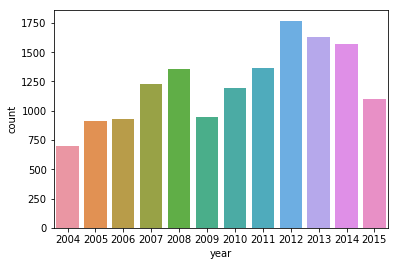

In [96]:
import seaborn as sns
ax = sns.countplot(x="year", data=df1)
ax

<b>Creating three slots of years 

In [97]:
def group_by_year(year):
    year = int(year)
    if year >= 2004 and year <= 2007:
        return 1
    elif year >= 2008 and year <= 2011:
        return 2
    else:
        return 3
    
df1["year_group"] = df1["year"].apply(group_by_year)

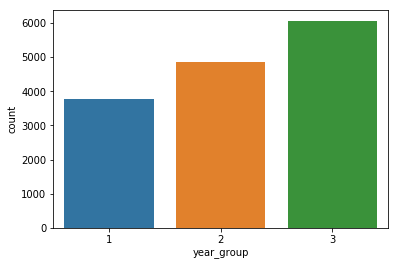

In [98]:
ax = sns.countplot(x="year_group", data=df1)
ax

In [99]:


d1 = df1[df1["year_group"] == 1]
d2 = df1[df1["year_group"] == 2]
d3 = df1[df1["year_group"] == 3]

<b>Now we can perfron above steps for different time frames d1,d2,d3 to see how these skills and characterstics changing with time.

In [100]:
# For each data frame create the TF_IDF matrix, perform SVD decomposition and then KMeans cluster
year_wise_dfs = [d1, d2, d3]
CLUSTERS = 6
clustered_data = []

for idx, year_wise_df in enumerate(year_wise_dfs):
    print("Year group: {0}".format(idx))
    
    # create the TF-IDF matrix
    vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3)
    req_qual_tfidf = vec_tfidf.fit_transform(year_wise_df['RequiredQual_processedtext'])
    
    # Use SVD to reduce dimensions
    svd = TruncatedSVD(1000)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)
    X_lsa = lsa.fit_transform(req_qual_tfidf)
    
    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))
    
    # KMeans clustering
    km = KMeans(n_clusters=CLUSTERS, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    km.fit(X_lsa)
    
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(CLUSTERS))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km.labels_))
    
    clustered_data.append(km)
    
    print_terms(km, CLUSTERS)

Year group: 0
Explained variance of the SVD step: 93%
Clusters: 6
Silhouette Coefficient for clusters: 0.017
Cluster 0: honesty 2005 labview laws bugzilla distributed complete container generate aes
Cluster 1: 4th compliance compliant aes identifying how labview innodb honesty laws
Cluster 2: honesty combinatorial labview aes groovy container copywriter 2005 avoid attentiveness
Cluster 3: changing diagnostics jax change appraising allow honesty labview christian container
Cluster 4: candidate ida democracy encouraging kerio he for how labview 2005
Cluster 5: face account cfo bi calculus dish create labview computational contractors
Year group: 1
Explained variance of the SVD step: 90%
Clusters: 6
Silhouette Coefficient for clusters: 0.015
Cluster 0: february mineral keyboarding chemical card drilling investigative css delphi geographical
Cluster 1: modifying 2003 concrete intellectual mbps affecting ccie azerbaijan css first
Cluster 2: 40 continually css affecting amplifier modifying j